# OSMnx features demo

Author: [Geoff Boeing](https://geoffboeing.com/)

Model street networks and other geospatial features anywhere in the world from OpenStreetMap then analyze and visualize them.

More info:

- [Documentation](https://osmnx.readthedocs.io/)
- [Journal article and citation info](https://geoffboeing.com/publications/osmnx-paper/)
- [Code repository](https://github.com/gboeing/osmnx)
- [Examples gallery](https://github.com/gboeing/osmnx-examples)

This notebook provides a quick tour of some of OSMnx's key features including how to:

- download/model street networks
- calculate stats
- visualize centrality
- impute speeds/travel times and calculate shortest paths
- attach and visualize elevation data and edge grades
- download/model other infrastructure types
- download points of interest data


In [1]:
import networkx as nx
import osmnx as ox

ox.__version__

'1.9.4'

In [6]:
import geopandas as gpd

## Working with street networks


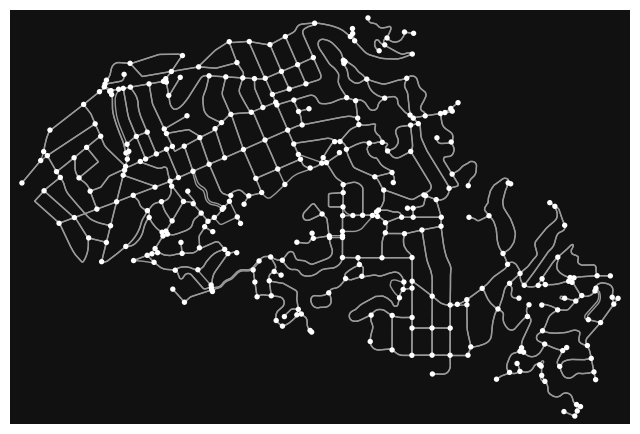

In [2]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
fig, ax = ox.plot_graph(G)

OSMnx geocodes the query "Piedmont, California, USA" to retrieve the place boundaries of that city from the Nominatim API, retrieves the drivable street network data within those boundaries from the Overpass API, constructs a graph model, then simplifies/corrects its topology such that nodes represent intersections and dead-ends and edges represent the street segments linking them. All of this is discussed in detail in the documentation and these examples.

OSMnx models all networks as NetworkX `MultiDiGraph` objects. You can convert to:

- undirected MultiGraphs
- DiGraphs without (possible) parallel edges
- GeoPandas node/edge GeoDataFrames


In [3]:
# convert your MultiDiGraph to an undirected MultiGraph
M = ox.convert.to_undirected(G)
M

In [5]:
# convert your MultiDiGraph to a DiGraph without parallel edges
D = ox.convert.to_digraph(G)
D

In [8]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
53017091,37.826250,-122.247604,3,NaN,POINT (-122.24760 37.82625)
53018397,37.824220,-122.247198,3,stop,POINT (-122.24720 37.82422)
53018399,37.824900,-122.246113,3,NaN,POINT (-122.24611 37.82490)
53018402,37.825406,-122.245338,3,NaN,POINT (-122.24534 37.82541)
53018404,37.825948,-122.244467,3,NaN,POINT (-122.24447 37.82595)


<Axes: >

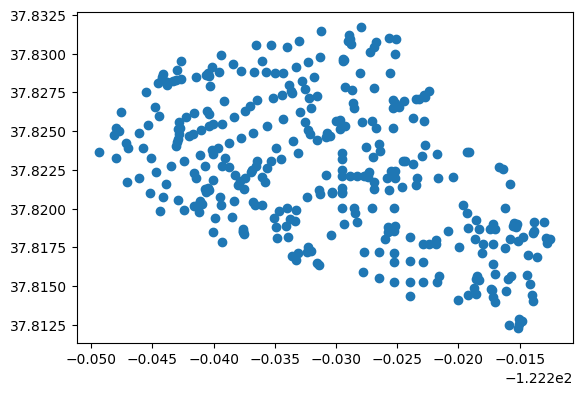

In [10]:
gdf_nodes.plot()

In [13]:
gdf_edges

osmid              name      highway  oneway  \
u           v         key                                                      
53017091    53064327  0       6345781       Rose Avenue  residential   False   
            53075599  0       6345781       Rose Avenue  residential   False   
53018397    53018399  0       6327298       Lake Avenue  residential   False   
            53018411  0     196739937      Linda Avenue     tertiary   False   
            53097980  0     196739937      Linda Avenue     tertiary   False   
...                               ...               ...          ...     ...   
10747500178 53062956  0       6341125  Sunnyside Avenue  residential   False   
10879933448 53036558  0       6373458     Winsor Avenue     tertiary   False   
            682931951 0       6373458     Winsor Avenue     tertiary   False   
            53028192  0    1170449559   Warfield Avenue  residential   False   
11036463561 53119042  0       6391705         Echo Lane  residential   False   

                          reversed   length  \
u           v         key                     
53017091    53064327  0      False  230.124   
            53075599  0       True  122.235   
53018397    53018399  0      False  121.648   
            53018411  0      False   37.594   
            53097980  0       True  100.205   
...                            ...      ...   
10747500178 53062956  0       True  136.017   
10879933448 53036558  0      False   11.323   
            682931951 0       True   11.506   
            53028192  0       True  165.539   
11036463561 53119042  0      False  128.246   

                                                                    geometry  \
u           v         key                                                      
53017091    53064327  0    LINESTRING (-122.24760 37.82625, -122.24750 37...   
            53075599  0    LINESTRING (-122.24760 37.82625, -122.24771 37...   
53018397    53018399  0    LINESTRING (-122.24720 37.82422, -122.24712 37...   
            53018411  0    LINESTRING (-122.24720 37.82422, -122.24713 37...   
            53097980  0    LINESTRING (-122.24720 37.82422, -122.24772 37...   
...                                                                      ...   
10747500178 53062956  0    LINESTRING (-122.24521 37.82099, -122.24527 37...   
10879933448 53036558  0    LINESTRING (-122.23761 37.81847, -122.23763 37...   
            682931951 0    LINESTRING (-122.23761 37.81847, -122.23759 37...   
            53028192  0    LINESTRING (-122.23761 37.81847, -122.23771 37...   
11036463561 53119042  0    LINESTRING (-122.22726 37.83012, -122.22741 37...   

                          lanes maxspeed bridge junction  
u           v         key                                 
53017091    53064327  0     NaN      NaN    NaN      NaN  
            53075599  0     NaN      NaN    NaN      NaN  
53018397    53018399  0     NaN      NaN    NaN      NaN  
            53018411  0     NaN      NaN    NaN      NaN  
            53097980  0     NaN      NaN    NaN      NaN  
...                         ...      ...    ...      ...  
10747500178 53062956  0     NaN      NaN    NaN      NaN  
10879933448 53036558  0     NaN      NaN    NaN      NaN  
            682931951 0     NaN      NaN    NaN      NaN  
            53028192  0     NaN      NaN    NaN      NaN  
11036463561 53119042  0     NaN   15 mph    NaN      NaN  

[944 rows x 11 columns]

<Axes: >

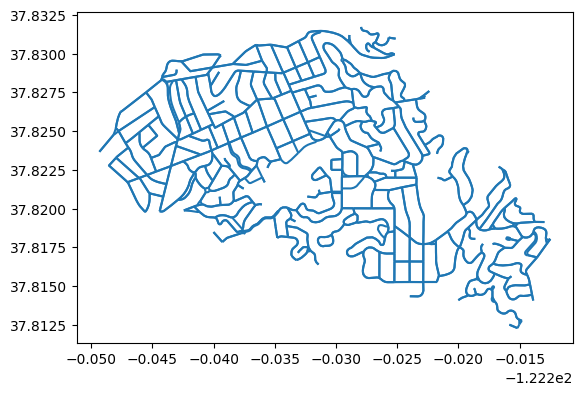

In [12]:
gdf_edges.plot()

In [14]:
gdf_edges.head()

osmid          name      highway  oneway reversed  \
u        v        key                                                          
53017091 53064327 0      6345781   Rose Avenue  residential   False    False   
         53075599 0      6345781   Rose Avenue  residential   False     True   
53018397 53018399 0      6327298   Lake Avenue  residential   False    False   
         53018411 0    196739937  Linda Avenue     tertiary   False    False   
         53097980 0    196739937  Linda Avenue     tertiary   False     True   

                        length  \
u        v        key            
53017091 53064327 0    230.124   
         53075599 0    122.235   
53018397 53018399 0    121.648   
         53018411 0     37.594   
         53097980 0    100.205   

                                                                geometry  \
u        v        key                                                      
53017091 53064327 0    LINESTRING (-122.24760 37.82625, -122.24750 37...   
         53075599 0    LINESTRING (-122.24760 37.82625, -122.24771 37...   
53018397 53018399 0    LINESTRING (-122.24720 37.82422, -122.24712 37...   
         53018411 0    LINESTRING (-122.24720 37.82422, -122.24713 37...   
         53097980 0    LINESTRING (-122.24720 37.82422, -122.24772 37...   

                      lanes maxspeed bridge junction  
u        v        key                                 
53017091 53064327 0     NaN      NaN    NaN      NaN  
         53075599 0     NaN      NaN    NaN      NaN  
53018397 53018399 0     NaN      NaN    NaN      NaN  
         53018411 0     NaN      NaN    NaN      NaN  
         53097980 0     NaN      NaN    NaN      NaN

You can create a graph from node/edge GeoDataFrames, as long as gdf_nodes is indexed by osmid and gdf_edges is multi-indexed by u, v, key (following normal MultiDiGraph structure). This allows you to load graph node/edge ShapeFiles or GeoPackage layers as GeoDataFrames then convert to a MultiDiGraph for graph analytics.


In [15]:
# convert node/edge GeoPandas GeoDataFrames to a NetworkX MultiDiGraph
G2 = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

In [16]:
G2

## Basic street network stats


In [17]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

4199465.640327132

In [18]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 352,
 'm': 944,
 'k_avg': 5.363636363636363,
 'edge_length_total': 112039.637,
 'edge_length_avg': 118.6860561440678,
 'streets_per_node_avg': 2.9488636363636362,
 'streets_per_node_counts': {0: 0, 1: 34, 2: 0, 3: 270, 4: 46, 5: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.09659090909090909,
  2: 0.0,
  3: 0.7670454545454546,
  4: 0.13068181818181818,
  5: 0.005681818181818182},
 'intersection_count': 318,
 'street_length_total': 58081.661,
 'street_segment_count': 495,
 'street_length_avg': 117.33668888888889,
 'circuity_avg': 1.111187394692194,
 'self_loop_proportion': 0.006060606060606061,
 'clean_intersection_count': 267,
 'node_density_km': 83.82018812578728,
 'intersection_density_km': 75.72391995454646,
 'edge_density_km': 26679.49844001397,
 'street_density_km': 13830.72656726762,
 'clean_intersection_density_km': 63.57951769768524}

stats documentation: https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats


In [19]:
# save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
ox.save_graph_geopackage(G, filepath="./data/mynetwork.gpkg")
ox.save_graphml(G, filepath="./data/mynetwork.graphml")

## Visualize street centrality

Here we plot the street network and color its edges (streets) by their relative closeness centrality.


In [20]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

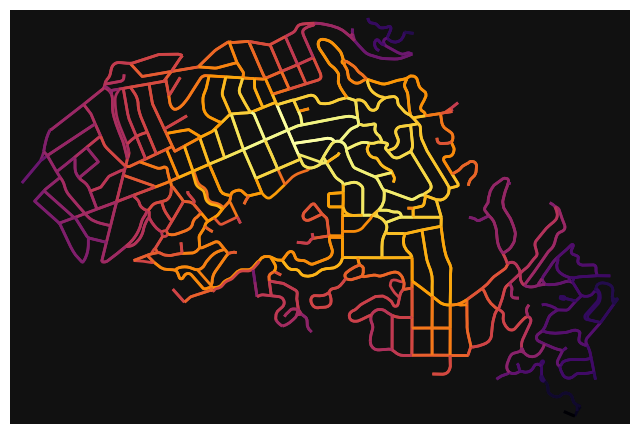

In [21]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

## Routing


In [22]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.routing.add_edge_speeds(G)
G = ox.routing.add_edge_travel_times(G)

In [23]:
# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, X=-122.245846, Y=37.828903)
dest = ox.distance.nearest_nodes(G, X=-122.215006, Y=37.812303)

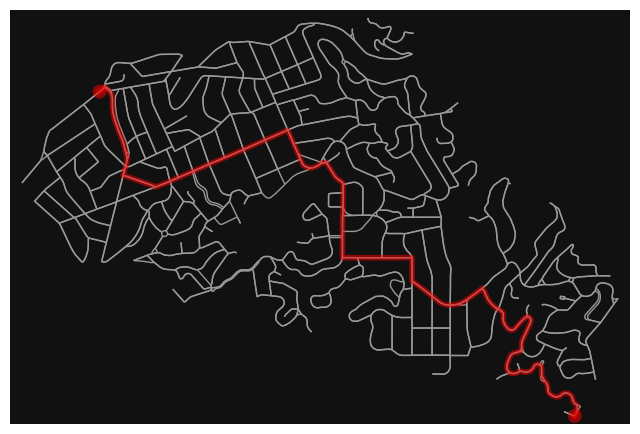

In [24]:
# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [25]:
# how long is our route in meters?
edge_lengths = ox.routing.route_to_gdf(G, route)["length"]
round(sum(edge_lengths))

4761

In [26]:
# how far is it between these two nodes as the crow flies?
# use OSMnx's vectorized great-circle distance (haversine) function
orig_x = G.nodes[orig]["x"]
orig_y = G.nodes[orig]["y"]
dest_x = G.nodes[dest]["x"]
dest_y = G.nodes[dest]["y"]
round(ox.distance.great_circle(orig_y, orig_x, dest_y, dest_x))

3124

You can add elevation attributes to your graph's nodes automatically with the `elevation` module, using either local raster files or the Google Maps Elevation API.


In [27]:
# add elevation to nodes automatically, calculate edge grades, plot network
# you need a google elevation api key to run this cell!
try:
    from keys import google_elevation_api_key

    G = ox.elevation.add_node_elevations_google(G, api_key=google_elevation_api_key)
    G = ox.elevation.add_edge_grades(G)
    nc = ox.plot.get_node_colors_by_attr(G, "elevation", cmap="plasma")
    fig, ax = ox.plot_graph(G, node_color=nc, node_size=20, edge_linewidth=2, edge_color="#333")
except ImportError:
    print("You need a google_elevation_api_key to run this cell.")

You need a google_elevation_api_key to run this cell.


Nodes are colored from lowest elevation (dark blue) to highest (bright yellow).

Example: create [elevation-based](12-node-elevations-edge-grades.ipynb) impedance functions to route around hills.


## Get networks other ways

make queries less ambiguous to help the geocoder out, if it's not finding what you're looking for


In [28]:
# you can make query an unambiguous dict to help the geocoder find it
place = {"city": "San Francisco", "state": "California", "country": "USA"}
G = ox.graph_from_place(place, network_type="drive", truncate_by_edge=True)
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color="y", edge_linewidth=0.2)

KeyboardInterrupt: 

In [29]:
# you can get networks anywhere in the world
G = ox.graph_from_place("Sinalunga, Italy", network_type="all")
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5)

KeyboardInterrupt: 

c:\Users\Hasem\miniconda3\envs\geogee\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


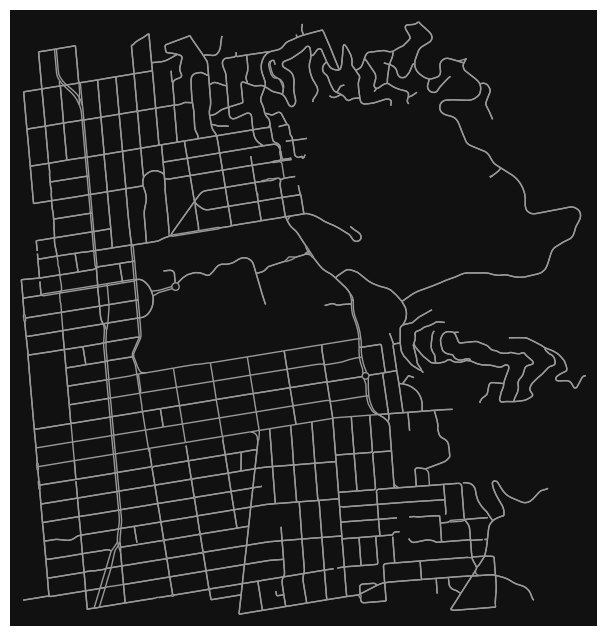

In [30]:
# or get network by address, coordinates, bounding box, or any custom polygon
# ...useful when OSM just doesn't already have a polygon for the place you want
wurster_hall = (37.870605, -122.254830)
one_mile = 1609  # meters
G = ox.graph_from_point(wurster_hall, dist=one_mile, network_type="drive")
fig, ax = ox.plot_graph(G, node_size=0)

Examples of [getting networks](01-overview-osmnx.ipynb) by coordinates, bounding box, or any custom polygon shape.


## Get other networked infrastructure types

...like rail or electric grids or even the canals of Venice and Amsterdam, using the `custom_filter` parameter: [see more examples](08-custom-filters-infrastructure.ipynb).


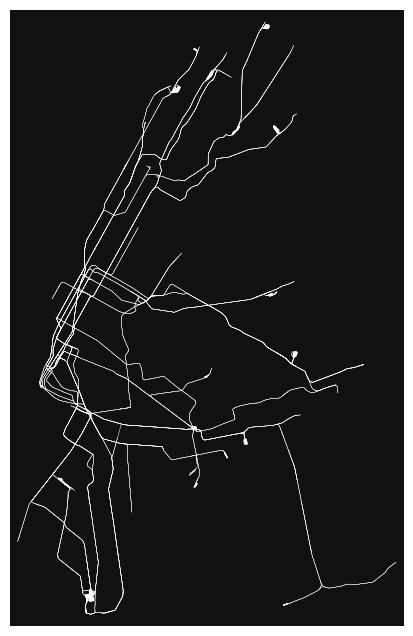

In [31]:
# get NY subway rail network
G = ox.graph_from_place(
    "New York, New York, USA",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"~"subway"]',
)

fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

## Get any geospatial features' geometries and attributes

Use the `features` module to download any OSM features, such as local amenities, points of interest, or building footprints, and turn them into a GeoDataFrame: [see docs](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.features). For more usage examples of downloading geospatial features from OSM, see [this notebook](16-download-osm-geospatial-features.ipynb).


In [39]:
# get all building footprints in some neighborhood
place = "SoHo, New York, NY"
tags = {"building": True}
gdf = ox.features_from_place(place, tags)
gdf.shape

(846, 86)

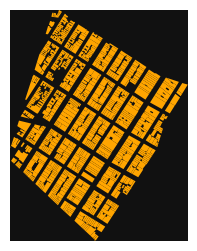

In [40]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

See the other notebooks for more examples of visualization with OSMnx.


In [34]:
# get all parks and bus stops in some neighborhood
tags = {"leisure": "park", "highway": "bus_stop"}
gdf = ox.features_from_place(place, tags)
gdf.shape

(21, 33)